In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
%matplotlib inline

In [3]:
from pandas_datareader import data

In [4]:
from datetime import datetime

In [8]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [26]:
end = datetime.now()
print(end)


2023-03-11 14:24:06.991439


In [31]:
import yfinance as yf
import pandas as pd


start_date = '2022-03-01'
end_date = '2023-03-01'

AAPL = yf.download('AAPL', start=start_date, end=end_date)
GOOG = yf.download('GOOG', start=start_date, end=end_date)
MSFT = yf.download('MSFT', start=start_date, end=end_date)
AMZN = yf.download('AMZN', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [33]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,150.538646,152.644821,148.584303,150.691554,150.158783,8.398563e+07
std,12.124565,12.045399,12.144832,12.130575,11.953845,2.356293e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973427,6.828505e+07
50%,149.070007,151.229996,147.429993,149.639999,149.363785,7.896100e+07
75%,159.629997,160.855003,156.150002,157.960007,157.233444,9.315185e+07
max,178.550003,179.610001,176.699997,178.960007,177.882446,1.826020e+08


In [34]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

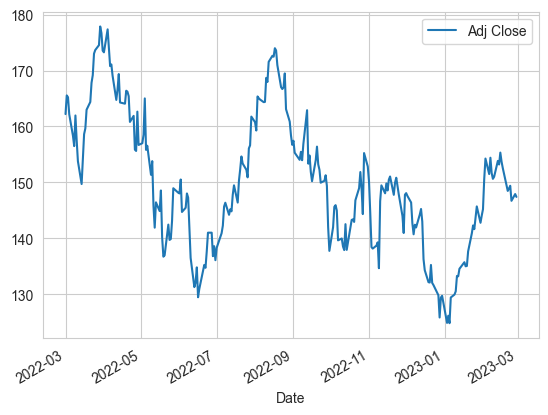

In [36]:
AAPL['Adj Close'].plot(legend=True)

<Axes: xlabel='Date'>

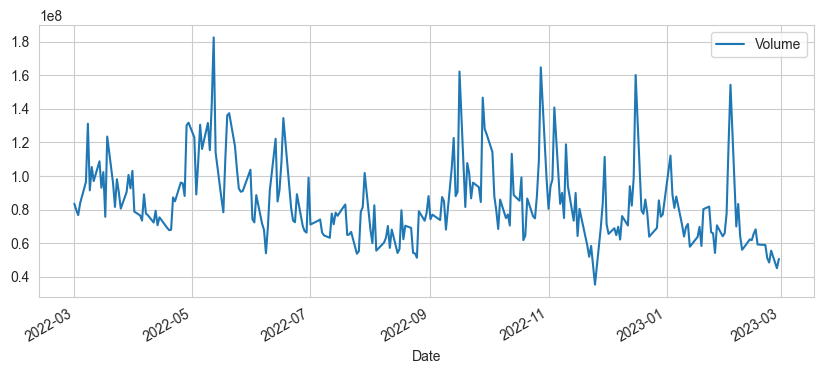

In [37]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [39]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

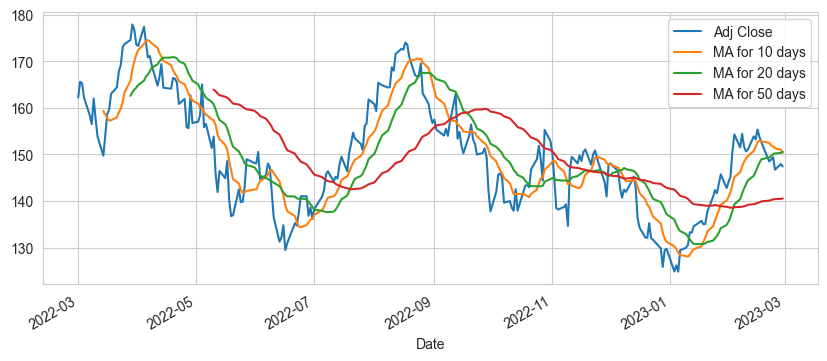

In [40]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<Axes: xlabel='Date'>

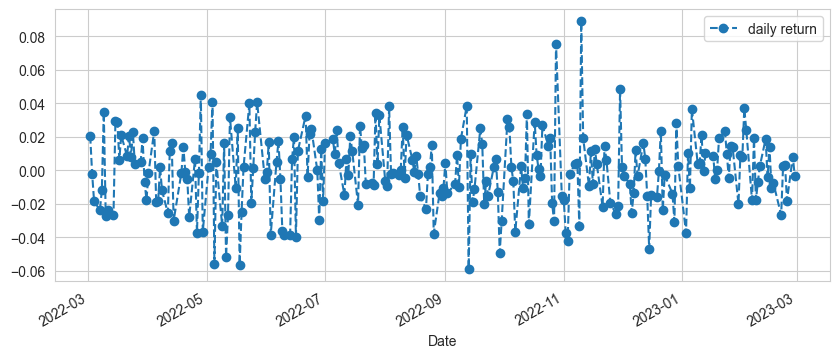

In [43]:
AAPL['daily return'] = AAPL['Adj Close'].pct_change()

AAPL['daily return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\sanja\AppData\Local\Temp\ipykernel_7088\4029311334.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['daily return'].dropna(),bins=100)


<Axes: xlabel='daily return', ylabel='Density'>

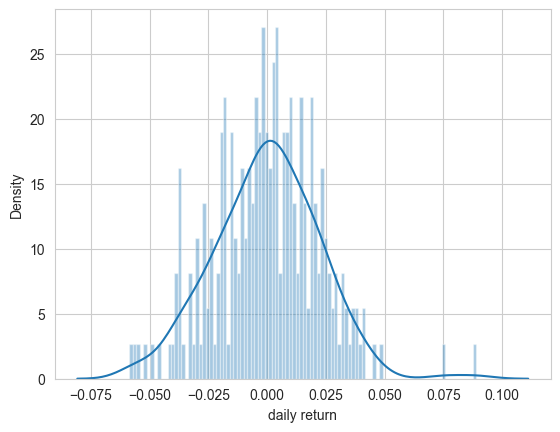

In [44]:
sns.distplot(AAPL['daily return'].dropna(),bins=100)

<Axes: >

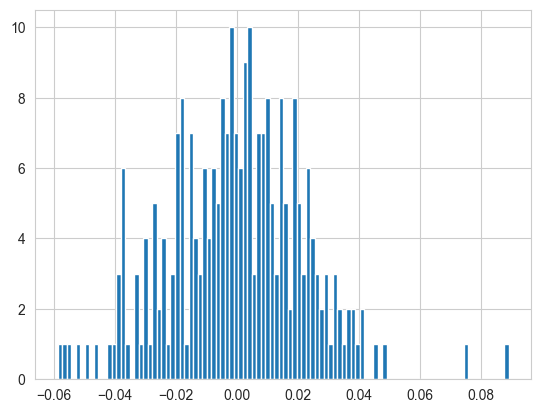

In [45]:
AAPL['daily return'].hist(bins=100)

In [46]:
closing_de = yf.download(tech_list,start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [47]:
closing_de.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-01,162.217331,151.141998,134.167999,292.084564
2022-03-02,165.557098,152.052505,134.751495,297.273682
2022-03-03,165.229095,147.898499,134.307999,293.045135
2022-03-04,162.187515,145.641006,132.121994,287.043976
2022-03-07,158.340820,137.453003,126.464500,276.200378


In [48]:
tech_rets =closing_de.pct_change()

In [49]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-01,NaN,NaN,NaN,NaN
2022-03-02,0.020588,0.006024,0.004349,0.017766
2022-03-03,-0.001981,-0.027320,-0.003291,-0.014224
2022-03-04,-0.018408,-0.015264,-0.016276,-0.020479
2022-03-07,-0.023718,-0.056220,-0.042820,-0.037777


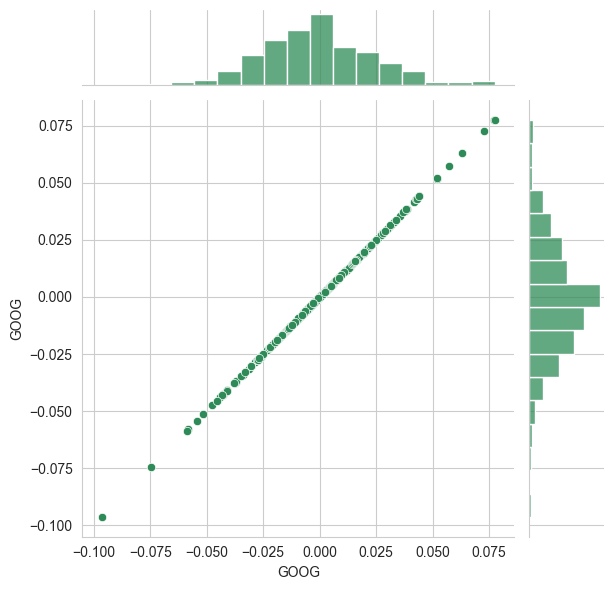

In [52]:
sns.jointplot(x='GOOG',y='GOOG',data=tech_rets,kind="scatter",color='seagreen')

In [63]:
from scipy.stats import pearsonr

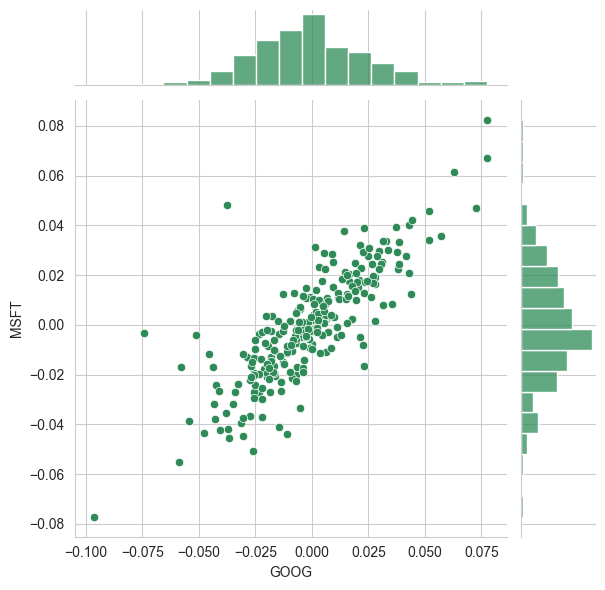

In [66]:
sns.jointplot(x='GOOG',y='MSFT',data=tech_rets,kind="scatter",color='seagreen',legend=True)

plt.show()


In [67]:
tech_rets.corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.694942,0.775035,0.807708
AMZN,0.694942,1.000000,0.756036,0.755875
GOOG,0.775035,0.756036,1.000000,0.825034
MSFT,0.807708,0.755875,0.825034,1.000000


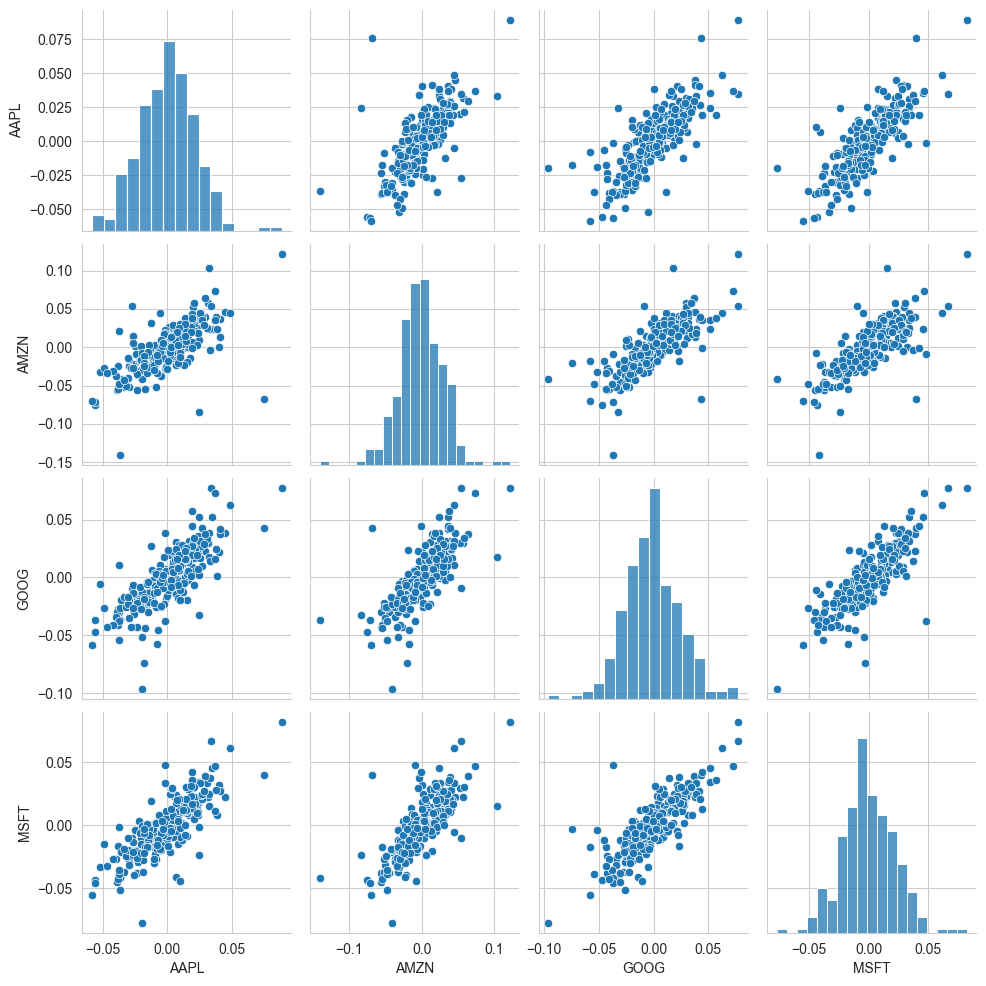

In [69]:
sns.pairplot(tech_rets.dropna())

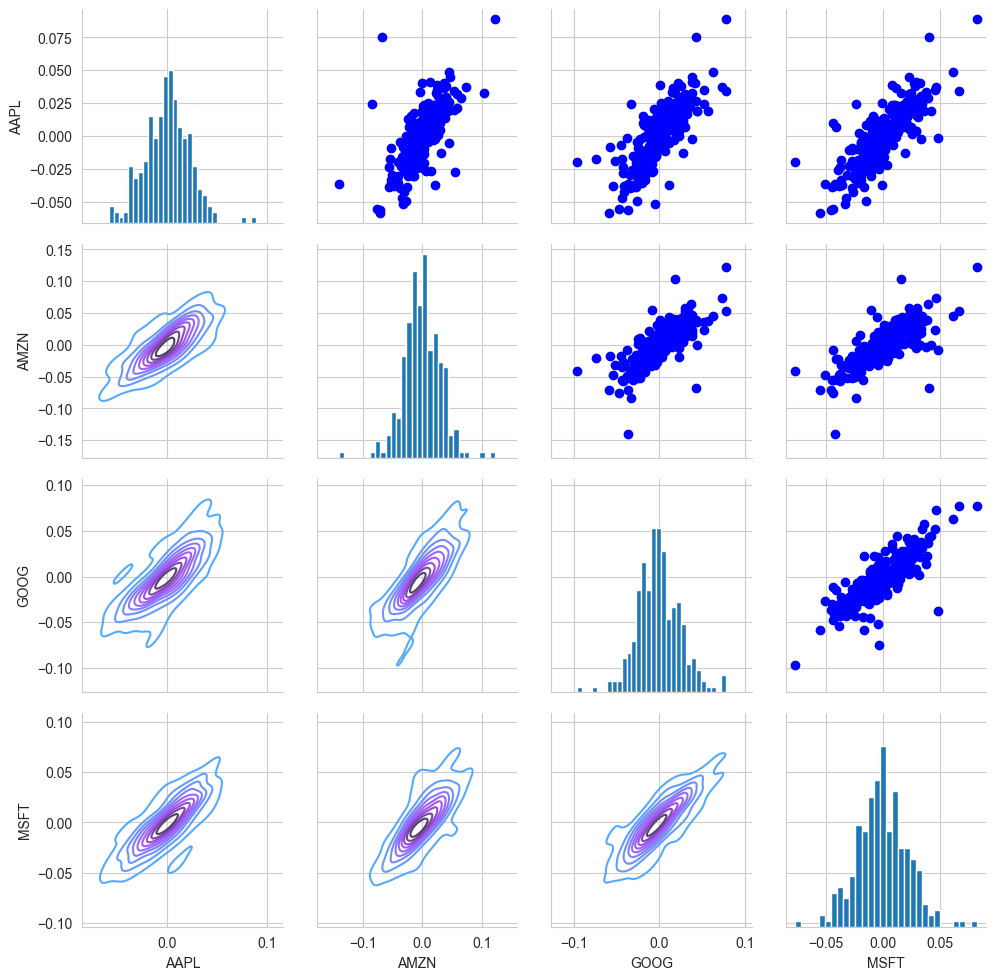

In [71]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color = 'blue')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

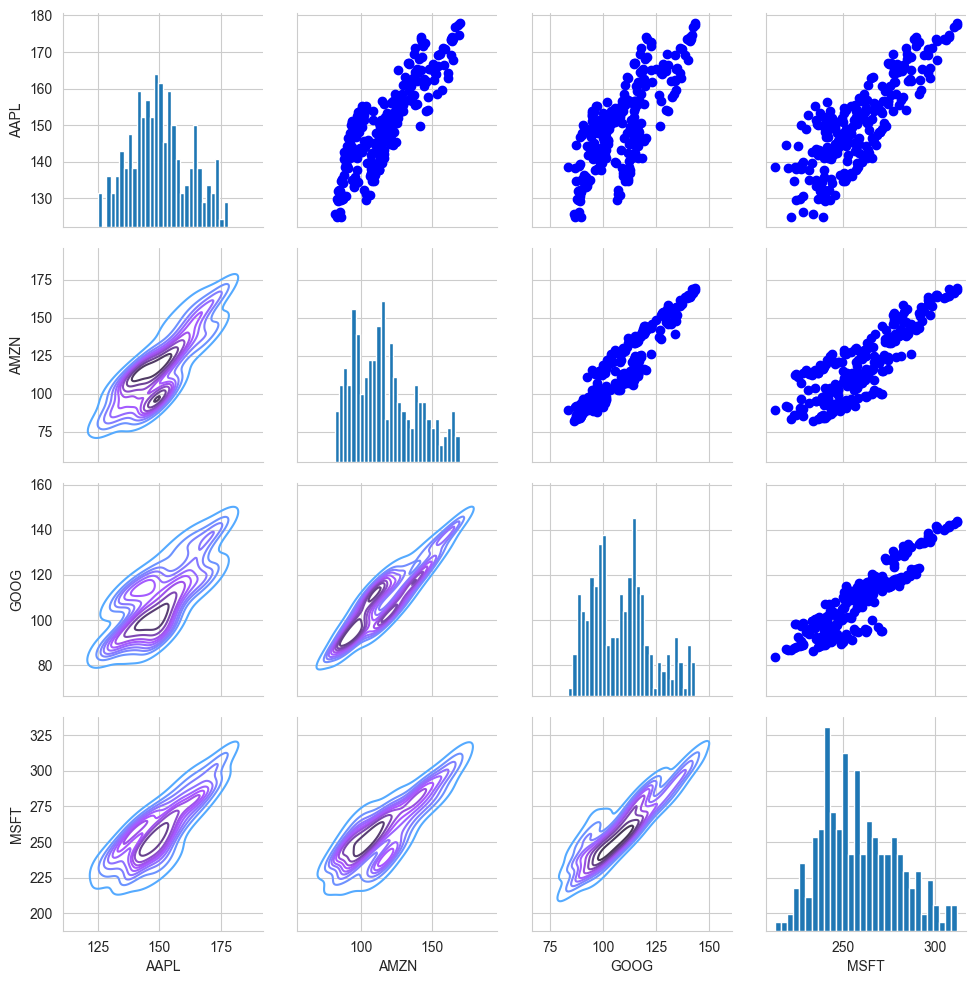

In [72]:
returns_fig = sns.PairGrid(closing_de)

returns_fig.map_upper(plt.scatter,color = 'blue')

returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

returns_fig.map_diag(plt.hist, bins=30)

In [73]:
closing_de.corr()

,AAPL,AMZN,GOOG,MSFT
AAPL,1.000000,0.844563,0.752739,0.827882
AMZN,0.844563,1.000000,0.918328,0.837079
GOOG,0.752739,0.918328,1.000000,0.903931
MSFT,0.827882,0.837079,0.903931,1.000000


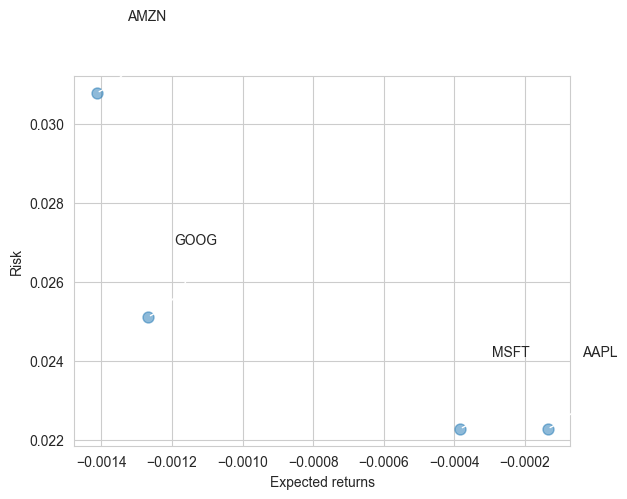

In [78]:

rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(x=rets.mean(), y=rets.std(),alpha = 0.5,s =area)


plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

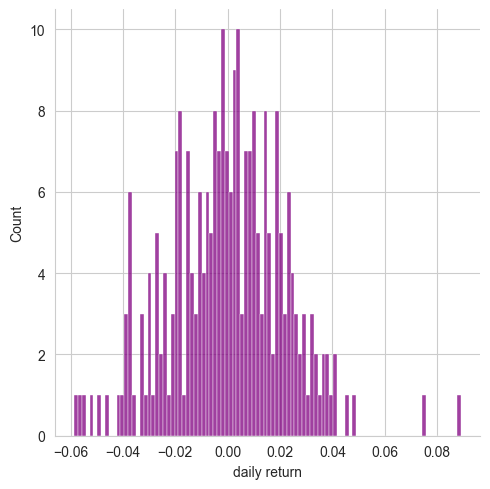

In [77]:
sns.displot(AAPL['daily return'].dropna(),bins=100,color="purple")

In [79]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-03-02,0.020588,0.006024,0.004349,0.017766
2022-03-03,-0.001981,-0.027320,-0.003291,-0.014224
2022-03-04,-0.018408,-0.015264,-0.016276,-0.020479
2022-03-07,-0.023718,-0.056220,-0.042820,-0.037777
2022-03-08,-0.011676,-0.010465,0.006437,-0.010971


In [80]:
rets['AAPL'].quantile(0.05)

-0.037370278099558195